In [78]:
import pandas as pd
import numpy as np

In [112]:
cwd= "C:\\Users\\1997.tanuja\\DocumentML\\100daysofml\\day3\\EI-reg-En-train"
file1 = pd.read_csv(cwd+"\\EI-reg-En-anger-train.txt",sep="\t")
file2 = pd.read_csv(cwd+"\\EI-reg-En-fear-train.txt",sep="\t")
file3 = pd.read_csv(cwd+"\\EI-reg-En-joy-train.txt",sep="\t")
file4 = pd.read_csv(cwd+"\\EI-reg-En-sadness-train.txt",sep="\t")

In [113]:
file1 = file1.head(1533)
file2 = file2.head(1533)
file3 = file3.head(1533)
file4 = file4.head(1533)

In [114]:
# frames = [file1,file2,file3,file4]
# result = pd.concat(frames)

data1 = file1.append(file2, ignore_index=True)
data2 = data1.append(file3, ignore_index=True)
data3 = data2.append(file4, ignore_index=True)

In [115]:
from sklearn.utils import shuffle
df = shuffle(data3)

In [115]:
df.isnull()

In [116]:
df = df[['Tweet','Affect Dimension']]

In [117]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.2)


In [118]:
import re

In [119]:
combi = train.append(test, ignore_index=True)

In [120]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [121]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet'], "@[\w]*")

In [122]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [123]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [124]:
combi

,Tweet,Affect Dimension,tidy_tweet
0,#Quote 'To say that You know Yourself without ...,sadness,#Quote that know Yourself without ever having ...
1,"@KatherineArabis It’s taken for granted, while...",anger,taken granted while misogyny treated normal an...
2,@LakersTakeover it ain't that serious. #HOUvsN...,fear,that serious #HOUvsNE #awful #igotbetterthings...
3,@eleanor_binks at least Blake lively and Ryan ...,joy,least Blake lively Ryan Reynolds still togethe...
4,Let's not panic. Beat NYG who's atop the divis...,fear,panic Beat atop division come home against Cle...
5,#OneSimpleChange: Drink sparkling water instea...,joy,#OneSimpleChange Drink sparkling water instead...
6,@patthemanager how could I work with @chanceth...,sadness,could work with #serious
7,"Blessed are those who mourn, for they will be ...",sadness,Blessed those mourn they will comforted
8,How do adults remain jovial amidst all the bad...,joy,adults remain jovial amidst news
9,@1xfly you sir are hilarious,joy,hilarious


In [125]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#Quote, that, know, Yourself, without, ever, ...
1    [taken, granted, while, misogyny, treated, nor...
2    [that, serious, #HOUvsNE, #awful, #igotbettert...
3    [least, Blake, lively, Ryan, Reynolds, still, ...
4    [panic, Beat, atop, division, come, home, agai...
Name: tidy_tweet, dtype: object

In [126]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#quot, that, know, yourself, without, ever, h...
1    [taken, grant, while, misogyni, treat, normal,...
2    [that, seriou, #houvsn, #aw, #igotbetterthings...
3    [least, blake, live, ryan, reynold, still, tog...
4    [panic, beat, atop, divis, come, home, against...
Name: tidy_tweet, dtype: object

In [127]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

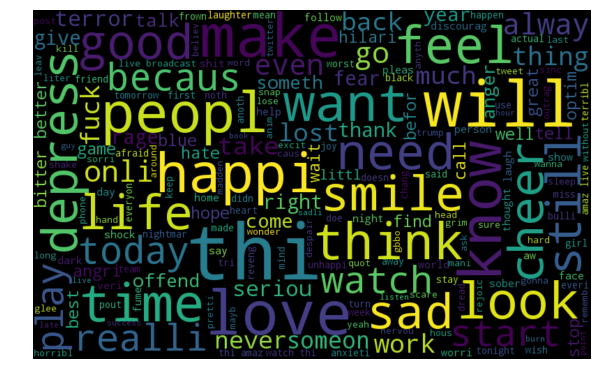

In [128]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:4905,:]
test_bow = bow[4905:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Affect Dimension'], random_state=42, test_size=0.2)

lreg = LogisticRegression()
lreg = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(xtrain_bow, ytrain)
#lreg.fit(xtrain_bow, ytrain) # training the model



In [140]:
from sklearn import metrics
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(ytrain, lreg.predict(xtrain_bow)))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(yvalid, lreg.predict(xvalid_bow)))
 

Multinomial Logistic regression Train Accuracy ::  0.933995922528
Multinomial Logistic regression Test Accuracy ::  0.841997961264


In [149]:
lreg.predict(test_bow)

array(['sadness', 'joy', 'fear', ..., 'fear', 'fear', 'fear'], dtype=object)

In [154]:
cwd= "C:\\Users\\1997.tanuja\\DocumentML\\100daysofml\\day3\\2018-EI-reg-En-test"
file1 = pd.read_csv(cwd+"\\2018-EI-reg-En-anger-test.txt",sep="\t")
file2 = pd.read_csv(cwd+"\\2018-EI-reg-En-fear-test.txt",sep="\t")
file3 = pd.read_csv(cwd+"\\2018-EI-reg-En-joy-test.txt",sep="\t")
file4 = pd.read_csv(cwd+"\\2018-EI-reg-En-sadness-test.txt",sep="\t")

In [159]:
file1 = file1.head(1500)
file2 = file2.head(1500)
file3 = file3.head(1500)
file4 = file4.head(1500)

In [160]:
# frames = [file1,file2,file3,file4]
# result = pd.concat(frames)

data1 = file1.append(file2, ignore_index=True)
data2 = data1.append(file3, ignore_index=True)
data3 = data2.append(file4, ignore_index=True)

In [164]:
df = shuffle(data3)

In [170]:
df = df[['Tweet','Affect Dimension']]
comb= df

In [171]:
comb['tidy_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")
comb['tidy_tweet'] = comb['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
comb['tidy_tweet'] = comb['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [176]:
tokenized_tweet = comb['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

5742    [This, girl, told, about, recent, displeasing,...
5906                   [mother, accomplished, programmer]
4471           [Alphonse, studying, become, nutritionist]
4146                         [Terrence, studying, poetry]
443     [could, this, show, Disrespectful, many, mums,...
Name: tidy_tweet, dtype: object

In [177]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

5742    [thi, girl, told, about, recent, displeas, event]
5906                       [mother, accomplish, programm]
4471                [alphons, studi, becom, nutritionist]
4146                             [terrenc, studi, poetri]
443     [could, thi, show, disrespect, mani, mum, famili]
Name: tidy_tweet, dtype: object

In [178]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

comb['tidy_tweet'] = tokenized_tweet

In [179]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(comb['tidy_tweet'])

In [180]:
bow


<6000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 24667 stored elements in Compressed Sparse Row format>

In [181]:
lreg.predict(bow)

array(['joy', 'joy', 'anger', ..., 'anger', 'joy', 'sadness'], dtype=object)

In [182]:
comb['tidy_tweet']

5742            thi girl told about recent displeas event
5906                           mother accomplish programm
4471                     alphons studi becom nutritionist
4146                                 terrenc studi poetri
443             could thi show disrespect mani mum famili
3826    keep watch video took from door cinema club th...
1262                               father accomplish nurs
2468    most pathet after servic experi baleno servic ...
5995                                 made uncl feel happi
2233                                           wait shake
2310    respect breed cooper wherea fear breed doubt w...
3803    look forward next year charlott darkhawk sign ...
3028    master other strength master yourself true pow...
1108                       thi person studi becom janitor
138     sixth grade teacher thi year last year fifth g...
3551                            that brilliant music make
5876                     nichel found herself amaz situat
2114    thi ki